<a href="https://colab.research.google.com/github/afislonge/Algerian-forest-fire-ML/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Effective Handling of Errors
Ensure the dataset is clean, handle missing data, outliers, and ensure correct data types.

In [122]:
# Load the dataset
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Top 5
print("top 5 row using head")
print(df.head())
print()

# Bottom 5
print("bottom 5 row using head")
print(df.tail())
print()

# number of samples and columns
print("number of samples and columns")
print(df.shape)
print()

# number of entries in the dataframe
print("number of entries in the dataframe")
print(df.size)
print()

# column names in the dataframe
print("column names in the dataframe")
print(df.columns)
print()

# column name dtypes in the dataframe
print("column name dtypes in the dataframe")
print(df.dtypes)
print()

# dataframe info
print("dataframe info")
print(df.info())
print()

# check missing
print("check the missing value in each column")
print(df.isnull().sum())
print()

# check missing
print("check the missing value in each column")
print(df.isna().sum())
print()

# Check for duplicates
print("Check for duplicates")
print(df.duplicated().sum())
print()

# dataframe description
print("dataframe description")
print(df.describe())
print()

top 5 row using head
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  

bottom 5 row using head
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  

## Appropriate Feature Selection and Engineering
Identify and create the most relevant features for the model.

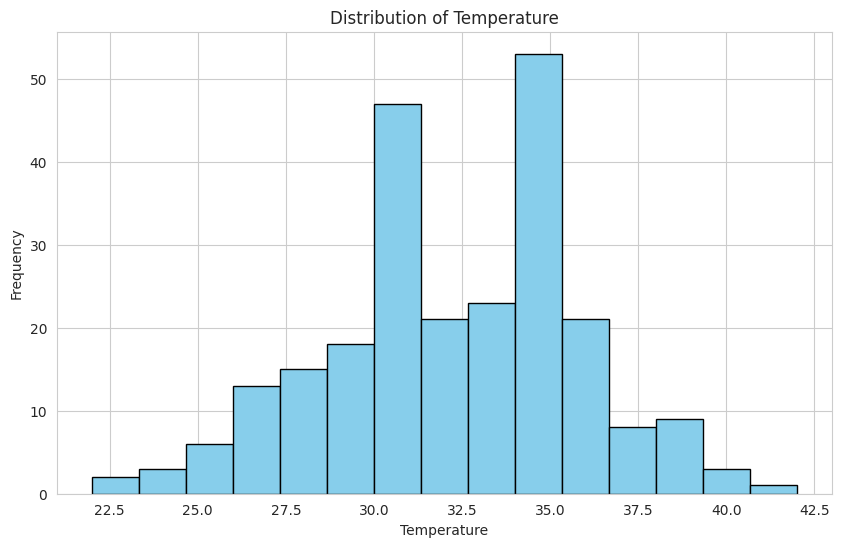

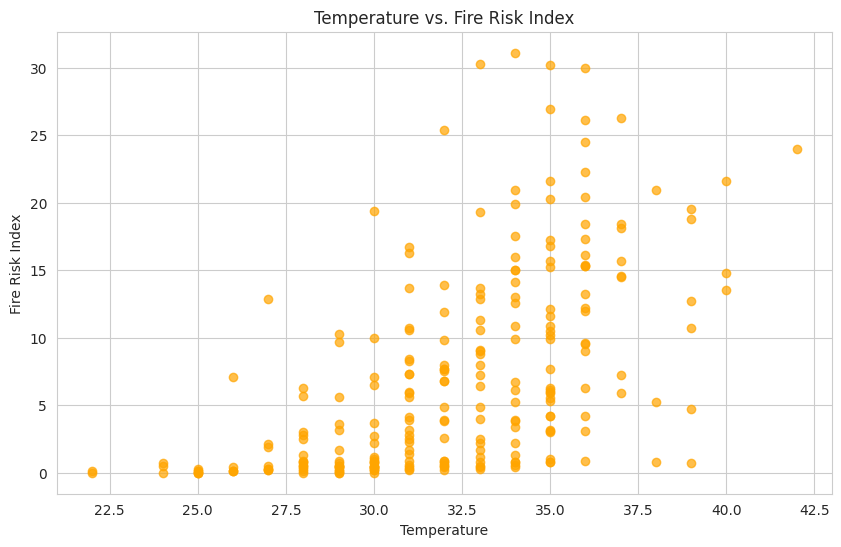

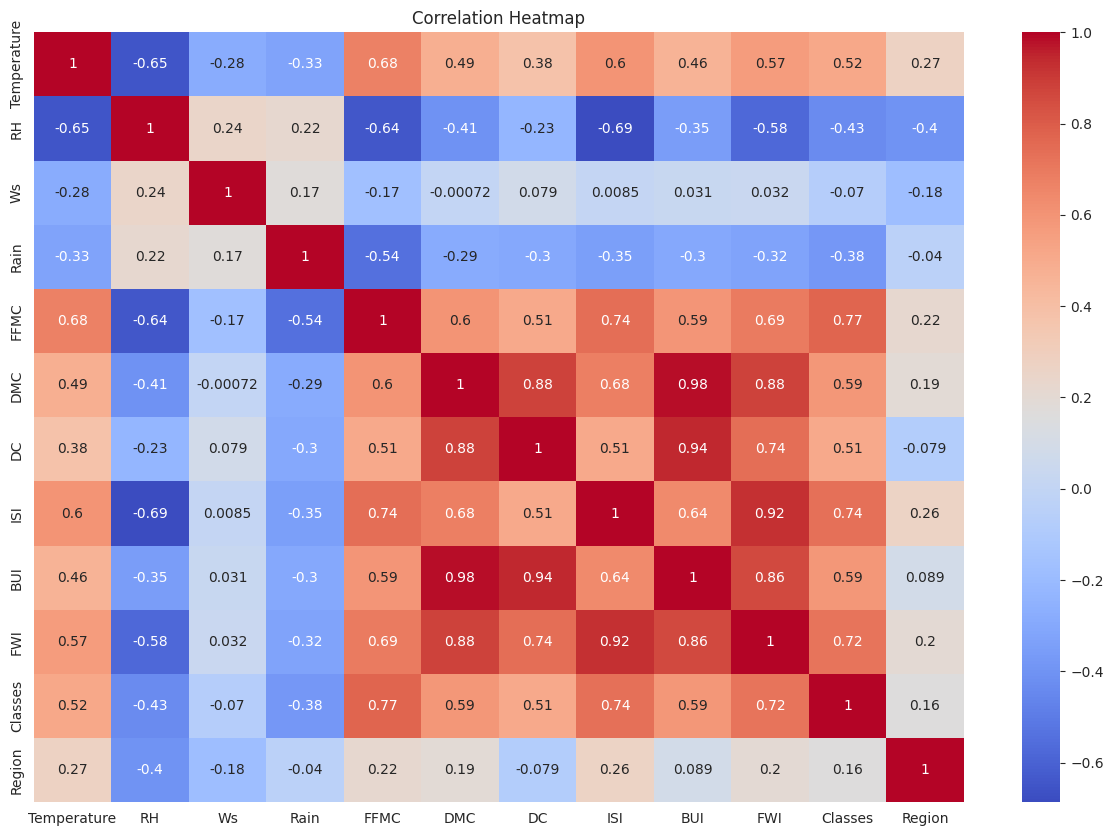

In [123]:
df_copy = df.drop(['day','month','year'],axis=1)

df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

corr = df_copy.corr()

# Histogram of Temperature
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
print("\n")

# Scatter Plot: Temperature vs. Fire Risk Index
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['FWI'], alpha=0.7, color='orange')
plt.title('Temperature vs. Fire Risk Index')
plt.xlabel('Temperature')
plt.ylabel('Fire Risk Index')
plt.show()
print("\n")

# Heatmap for correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [124]:
from sklearn.preprocessing import StandardScaler

# Selecting important features
features = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI']]
target = df['FWI']

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## Creation of Insightful Visualizations
Generate visualizations to understand the data distribution, relationships, and trends.

<Figure size 1000x600 with 0 Axes>

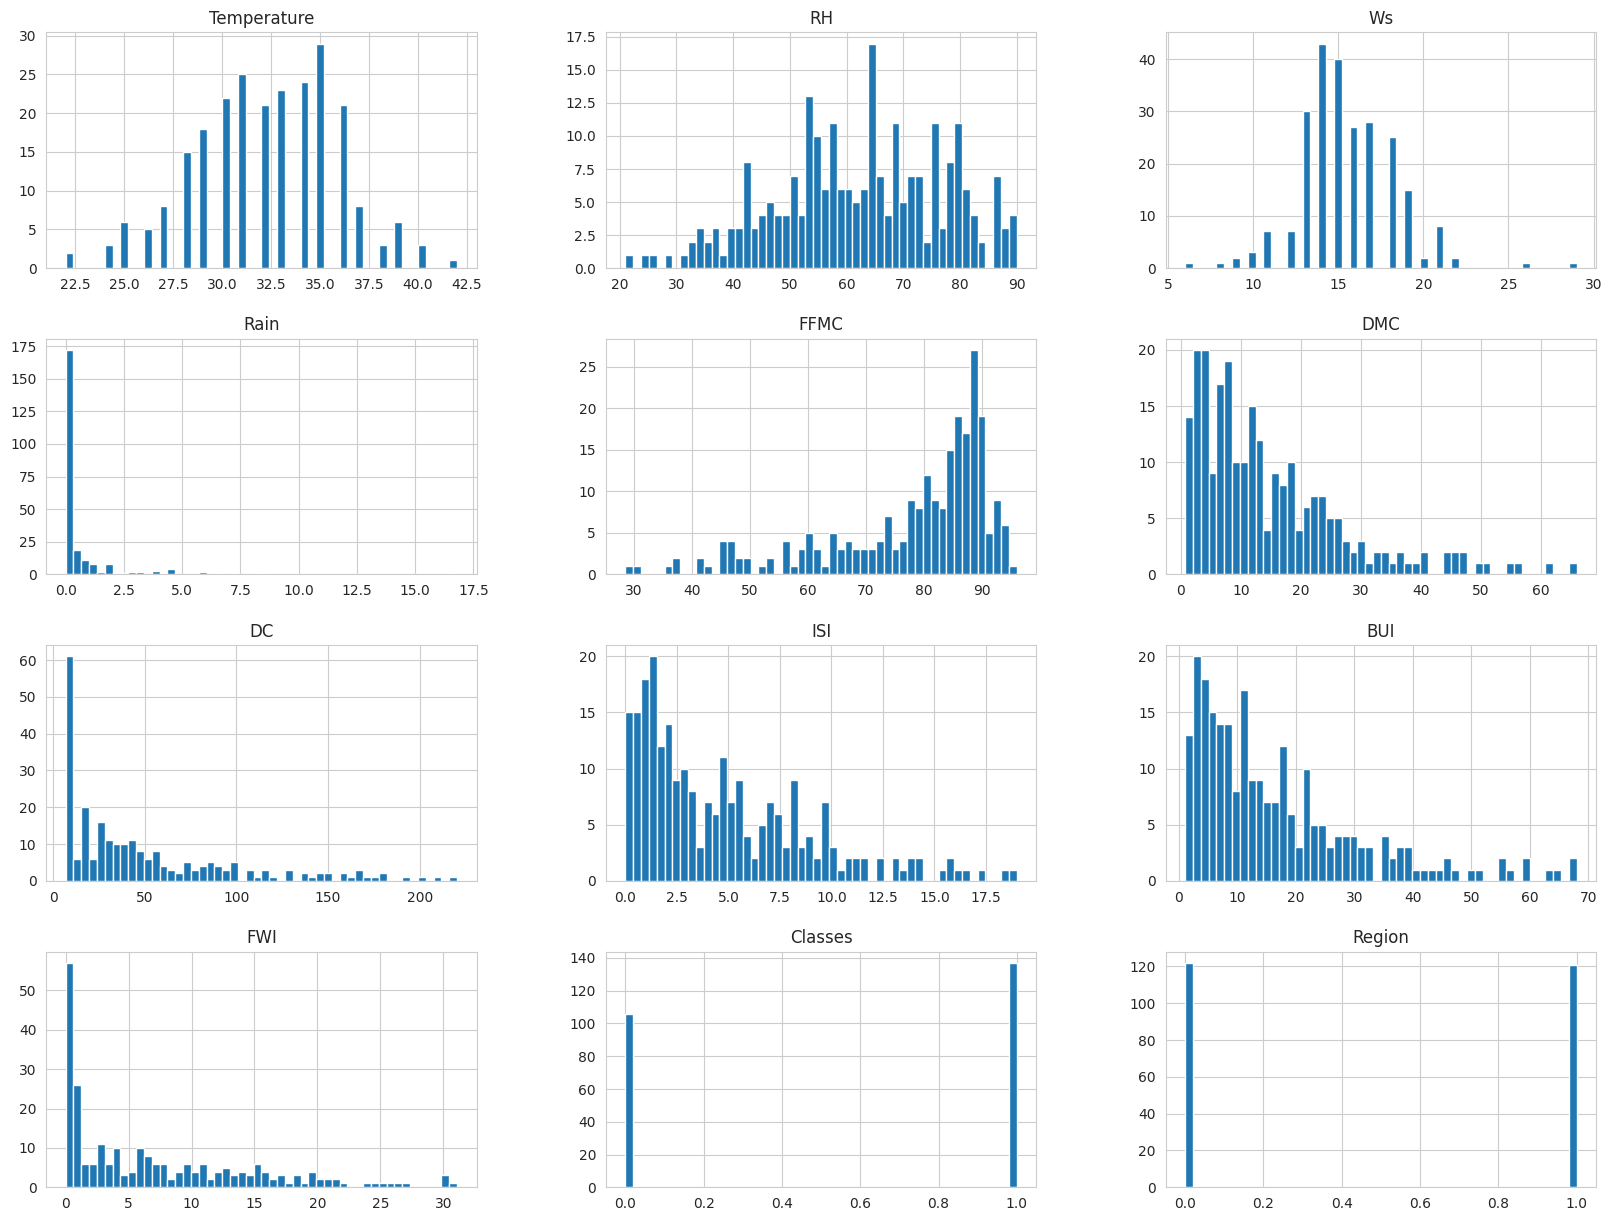

In [125]:

## Plot desnity plot for all features
plt.figure(figsize=(10, 6))
#plt.style.use('seaborn')
sns.set_style('whitegrid') # Applying a seaborn style
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

## Clear and Meaningful Observations Derived from the Visualizations
Extract meaningful insights from the visualizations to inform feature selection and modeling.

# **Based on the visualizations, we can derive the following observations:**

* Temperature Distribution: The histogram shows that temperatures are mostly concentrated between 25°C and 35°C.

* Fire Risk: The scatter plot indicates that higher temperatures are associated with a higher fire risk index.

* Correlation Insights: The heatmap reveals a strong correlation between Temperature, FFMC, and FWI, suggesting these are key predictors for fire occurrences.

## Implementation of Multiple Linear Regression and Polynomial Regression Models
Build and compare linear and polynomial regression models to predict the target variable.

In [126]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
df['Classes'].value_counts()



,count
Classes,
1,137
0,106


In [127]:
##drop month,day and yyear
df.drop(['day','month','year','FFMC','DMC','DC','ISI','BUI','Classes','Region'],axis=1,inplace=True)

## Independent And dependent features
X=df.drop(['FWI',],axis=1)
y=df['FWI']

In [128]:
X

,Temperature,RH,Ws,Rain
0,29,57,18,0.0
1,29,61,13,1.3
2,26,82,22,13.1
3,25,89,13,2.5
4,27,77,16,0.0
...,...,...,...,...
238,30,65,14,0.0
239,28,87,15,4.4
240,27,87,29,0.5
241,24,54,18,0.1


In [129]:
# split the input data & target into train & test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [130]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 4), (49, 4), (194,), (49,))

In [131]:
# scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train)
x_test_sc = scaler.transform(X_test)

In [132]:
# liner regression and polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lr=LinearRegression()
lr.fit(x_train_sc, y_train)

poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train_sc)
x_test_poly=poly.transform(x_test_sc)
# Train the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)


LinearRegression()

## Application of Regularization Techniques (Lasso, Ridge, etc.)
Implement and compare regularization techniques to prevent overfitting.

In [133]:
from sklearn.linear_model import Ridge, Lasso

# intiate the object_names for models
rd=Ridge(alpha=0.01)
rd.fit(x_train_sc, y_train)

ls=Lasso(alpha=0.01)
ls.fit(x_train_sc, y_train)

Lasso(alpha=0.01)

##  Effective Use of Cross-Validation and Hyperparameter Tuning
Optimize the models using cross-validation and tune hyperparameters for better performance.

In [134]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

# Cross-validation and hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation for the Linear Regression Model
lr_cv_scores = cross_val_score(lr, x_train_sc, y_train, cv=5)
print(f'Linear Cross-Validation Scores: {lr_cv_scores}')
print(f'Linear Mean CV Score: {lr_cv_scores.mean()}')

# Define parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Hyperparameter Tuning for Ridge Regression
ridge_grid = GridSearchCV(rd, param_grid, cv=5)
ridge_grid.fit(x_train_sc, y_train)
print(f'\nBest alpha for Ridge Regression: {ridge_grid.best_params_}')
print(f'Best cross-validation R² score for Ridge Regression: {ridge_grid.best_score_}')

# Hyperparameter Tuning for Lasso Regression
lasso_grid = GridSearchCV(ls, param_grid, cv=5)
lasso_grid.fit(x_train_sc, y_train)
print(f'\nBest alpha for Lasso Regression: {lasso_grid.best_params_}')
print(f'Best cross-validation R² score for Lasso Regression: {lasso_grid.best_score_}')

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_


Linear Cross-Validation Scores: [0.46414478 0.37639015 0.60324554 0.47925471 0.29616397]
Linear Mean CV Score: 0.4438398310588182

Best alpha for Ridge Regression: {'alpha': 10.0}
Best cross-validation R² score for Ridge Regression: 0.447879406536292

Best alpha for Lasso Regression: {'alpha': 0.1}
Best cross-validation R² score for Lasso Regression: 0.44390461408531906


## Comprehensive Evaluation of Model Performance
Assess the models using appropriate metrics and compare their performance.

In [135]:
# train the model
print("Performance Metrics of Linear Regression Model")
print()
print("coefficients", lr.coef_)
print("intercept", lr.intercept_)
y_pred_tr=lr.predict(x_train_sc) # prediction on train_data
y_pred_ts=lr.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

print()
print("="*150)

print("Performance Metrics of Polynomial Regression Model")
print()
y_pred = poly_reg.predict(x_test_poly)
print("coefficients", poly_reg.coef_)
print("intercept", poly_reg.intercept_)
y_pred_tr=poly_reg.predict(x_train_poly) # prediction on train_data
y_pred_ts=poly_reg.predict(x_test_poly) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

print()
print("="*150)

print("Performance Metrics of Ridge Regression Model")
print()
print("coefficients", rd.coef_)
print("intercept", rd.intercept_)
y_pred_tr=rd.predict(x_train_sc) # prediction on train_data
y_pred_ts=rd.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

print()
print("="*150)

print("Performance Metrics of Lasso Regression Model")
print()
print("coefficients", ls.coef_)
print("intercept", ls.intercept_)
y_pred_tr=ls.predict(x_train_sc) # prediction on train_data
y_pred_ts=ls.predict(x_test_sc) # prediction on test_data
print()

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on train data")
print("r2_score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error", mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error", mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_train, y_pred_tr)))

print()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Performance Metrics on test data")
print("r2_score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error", mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error", mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y_test, y_pred_ts)))

Performance Metrics of Linear Regression Model

coefficients [ 2.56494974 -3.06030591  1.93844739 -1.47711907]
intercept 7.420103092783506


-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on train data
r2_score 0.49048035646678534
mean_absolute_error 4.362646489741836
mean_squared_error 30.912902400657725
root_mean_squared_error 5.55993726589228

-----------------------------------------------------------------------------------------------------------------------------
Performance Metrics on test data
r2_score 0.29230391433246816
mean_absolute_error 3.8176890917523694
mean_squared_error 21.449151251974524
root_mean_squared_error 4.631322840396092

Performance Metrics of Polynomial Regression Model

coefficients [ 0.          2.2711003  -2.49463852  1.57553703 -5.42957529 -0.14833246
  0.2977645   0.12166594 -2.0383083   1.17581499 -0.61919998  1.04080244
  0.21613    -1.15747746  0.55053

### Key Observations:
* Linear, Ridge, and Lasso Regression have almost identical performance, with a training R² of 0.49 and a test R² around 0.29. Their RMSE values are also quite similar, indicating that they are underperforming on the test set compared to the polynomial model.

* Polynomial Regression performs better, with a higher test R² of 0.39 and a lower RMSE of 4.32, which indicates that it generalizes better to unseen data compared to the linear models. However, it might be slightly overfitting given its higher train R² (0.59).

## Testing the Model on Unseen Data
Validate the model on a test dataset and analyze the results.

In [136]:
import pickle

# save model
pickle.dump(scaler, open('fire_prediction_sc.pkl', 'wb'))
pickle.dump(best_ridge, open('fire_prediction_model.pkl', 'wb'))

In [137]:
# load model for validation
sc = pickle.load(open('fire_prediction_sc.pkl','rb'))
model = pickle.load(open('fire_prediction_model.pkl','rb'))

In [138]:
# predict model with unseed data. the dictionary value object value are between minimum and maximum value of the train feature value

unseen_data = pd.DataFrame({
    'Temperature': [29, 32, 28, 30],
    'RH': [45, 60, 50, 55],
    'Ws': [12, 15, 10, 13],
    'Rain': [0.1, 0.0, 0.2, 0.1]
})

In [139]:
df1 = pd.DataFrame(unseen_data)
df1

,Temperature,RH,Ws,Rain
0,29,45,12,0.1
1,32,60,15,0.0
2,28,50,10,0.2
3,30,55,13,0.1


### scaled the dataset

In [140]:
sc_df1 = sc.transform(df1)
sc_df1

array([[-0.87563202, -1.12111566, -1.37593111, -0.33214126],
       [-0.05233988, -0.12036518, -0.2352019 , -0.38015572],
       [-1.15006273, -0.78753217, -2.13641726, -0.2841268 ],
       [-0.60120131, -0.45394867, -0.99568804, -0.33214126]])

In [141]:
### Predict the model

In [142]:
model.predict(sc_df1)

array([6.56202355, 7.76498148, 3.47448312, 5.95877588])